In [1]:
# !pip install cellpose

In [2]:
!pip install --no-index ../input/global-wheels/numpy-1.20.0-cp37-cp37m-manylinux2010_x86_64.whl --find-links=../input/numpyv3
!pip install --no-index ../input/global-wheels/natsort-7.1.1-py3-none-any.whl --find-links=../input/natsort
!pip install --no-index ../input/global-wheels/fastremap-1.11.1-cp37-cp37m-manylinux1_x86_64.whl --find-links=../input/fastremap
!pip install --no-index ../input/global-wheels/edt-2.0.2-cp37-cp37m-manylinux2010_x86_64.whl --find-links=../input/edtpackage
!pip install --no-index ../input/global-wheels/pytorch_ranger-0.1.1-py3-none-any.whl --find-links=../input/pytorchranger
!pip install --no-index ../input/global-wheels/torch_optimizer-0.1.0-py3-none-any.whl --find-links=../input/torchoptimzier
!pip install --no-index ../input/global-wheels/cellpose-0.7.2-py3-none-any.whl --find-links=../input/cellposelibrary

Looking in links: ../input/numpyv3
Processing /kaggle/input/global-wheels/numpy-1.20.0-cp37-cp37m-manylinux2010_x86_64.whl
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
cudf 21.10.1 requires cupy-cuda110, which is not installed.
beatrix-jupyterlab 3.1.4 requires google-cloud-bigquery-storage, which is not installed.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
tfx-bsl 1.4.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15

In [3]:
# !ls ../input/cell-data-20211207

In [4]:
import cellpose

creating new log file


In [5]:
import shutil
import os
cell_dir_path = './cell'
if os.path.exists(cell_dir_path):
    shutil.rmtree(cell_dir_path)
shutil.copytree("../input/cell-data-20211207/cell_dataset", "./cell")

'./cell'

In [6]:
!python -m cellpose \
--train \
--use_gpu \
--dir "/kaggle/working/cell/train" \
--test_dir "/kaggle/working/cell/test" \
--n_epochs 500 \
--learning_rate 0.002 \
--pretrained_model None

Not all flows are present. Run flow generation again.
Not all flows are present. Run flow generation again.
100%|█████████████████████████████████████████| 122/122 [05:07<00:00,  2.52s/it]


In [7]:
model_file = "/kaggle/working/cell/train/models/" + os.listdir("/kaggle/working/cell/train/models/")[0]
model_file

'/kaggle/working/cell/train/models/cellpose_residual_on_style_on_concatenation_off_train_2021_12_10_07_18_17.050622'

In [8]:
# !cp /kaggle/working/cell/train/models/cellpose_residual_on_style_on_concatenation_off_train_2021_12_10_06_47_45.837472 ./

In [9]:
import numpy as np
from cellpose import models, io, plot
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
global out_line_img

In [10]:
def rle_encode(img):
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

test_dir = "../input/sartorius-cell-instance-segmentation/test/"
test_img_dirs = [test_dir + i for i in os.listdir(test_dir)]


test_imgs = []
for i in test_img_dirs:
    img = cv2.imread(i,cv2.IMREAD_COLOR)
    test_imgs.append(img)
# test_files = [fname for fname in test_dir.iterdir()]
# print(test_files)
# print(cv2.imread(str(test_files[0])).shape)
# plt.imshow(io.imread(str(test_files[0])))
# model = models.CellposeModel(gpu=True, pretrained_model='./cellpose_residual_on_style_on_concatenation_off_train_2021_12_08_07_16_13.734155')
# latest_file = "./cellpose_residual_on_style_on_concatenation_off_train_2021_12_08_07_16_13.734155"
model = models.CellposeModel(gpu=True, pretrained_model=model_file, torch=True, diam_mean=30.0, net_avg=True, device=None, residual_on=True, style_on=True, concatenation=False)

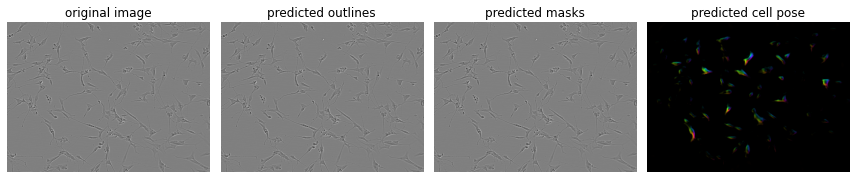

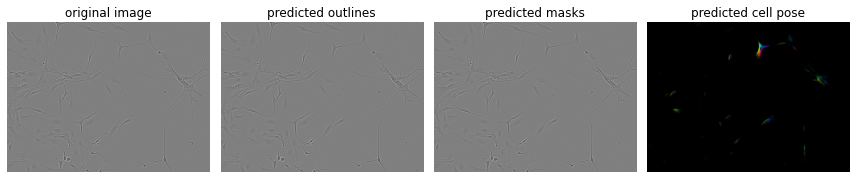

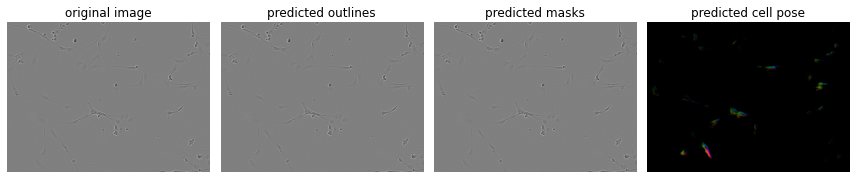

In [11]:
masks_all = []
styles_all = []
flows_all = []


for img in test_imgs:
    chan = [0, 1] # for black and white imgs
    #img = io.imread(filename)
    masks, flows, styles = model.eval(img, diameter=60, channels=chan)

    masks_all.append(masks)
    flows_all.append(flows)
    styles_all.append(styles)

# DISPLAY RESULTS

    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, img, masks, flows[0], channels=chan)
    plt.tight_layout()
    plt.show()


#model = models.Cellpose(gpu=False, model_type='cyto')
#model = models.Cellpose(gpu=True, model_type='cyto')




# ids, masks = [],[]
# for fn in test_files:
#     # preds, flows, _,_ = model.eval(io.imread(str(fn)), diameter=19, channels=[0,0], augment=True, resample=True)#when you run on your kernel.
#     preds, flows, _ = model.eval(cv2.imread(str(fn)), diameter=19, channels=[0,0], augment=True, resample=True)#when you submit.
    
#     plt.imshow(preds)
# #     print(preds.shape)
# #     break
    
#     for i in range (1, preds.max() + 1):
#         ids.append(fn.stem)
#         masks.append(rle_encode(preds == i))
        
# pd.DataFrame({'id':ids, 'predicted':masks}).to_csv('submission.csv', index=False)

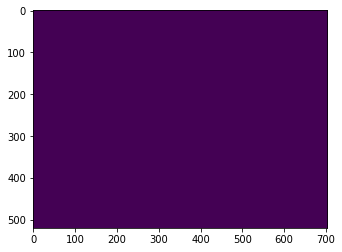

In [12]:
import matplotlib.pyplot as plt
plt.imshow(masks_all[0])

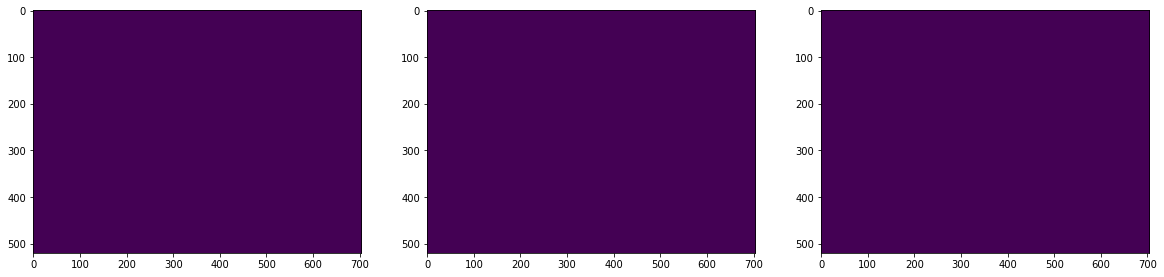

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,22))
plt.subplot(1,3,1)
plt.imshow(masks_all[0])
plt.subplot(1,3,2)
plt.imshow(masks_all[1])
plt.subplot(1,3,3)
plt.imshow(masks_all[2])

In [14]:
import numpy as np
from cellpose import models, io, plot
from pathlib import Path
import pandas as pd

def rle_encode(img):
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

test_dir = Path('../input/sartorius-cell-instance-segmentation/test')
test_files = [fname for fname in test_dir.iterdir()]
model = models.CellposeModel(gpu=True, pretrained_model=model_file, torch=True, diam_mean=30.0, net_avg=True, device=None, residual_on=True, style_on=True, concatenation=False)

# model = models.CellposeModel(gpu=True, pretrained_model=model_file)
#model = models.Cellpose(gpu=False, model_type='cyto')
#model = models.Cellpose(gpu=True, model_type='cyto')

ids, masks = [],[]
for fn in test_files:
    chan = [0, 1]
    # preds, flows, _,_ = model.eval(io.imread(str(fn)), diameter=19, channels=[0,0], augment=True, resample=True)#when you run on your kernel.
    preds, flows, _ = model.eval(img, diameter=60, channels=chan)#when you submit.
    for i in range (1, preds.max() + 1):
        ids.append(fn.stem)
        masks.append(rle_encode(preds == i))
        
pd.DataFrame({'id':ids, 'predicted':masks}).to_csv('submission.csv', index=False)

In [15]:
import pandas as pd
pd.read_csv('submission.csv').head()

,id,predicted
